# Example data loading using repository module

This repository includes a python module to help load the data.
it relies on `pandas`

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
import os
from pathlib import Path
from matplotlib import pyplot as plt

In [6]:
from model_analysis import * 

In [7]:
def plot_run_folder(run_folder_df):
    return None

## Loading the list of model results

A complete list of model results is stored in the [`run-manifest.csv`](run-manifest.csv) file.
This file is automatically generated using git hooks, and maintains a list of properties about each run.


In [8]:
run_manifest = read_manifest('run-manifest.csv')
run_manifest

,folder,version,last available data,number of countries,number of zones,countries,modelling zones,
0,./runs/base-fullrun-20200428T002523-3665610,v3,2020-03-24,1,11,{'France': True},"{'Bretagne': True, 'Corse': True, 'France': Tr...",
1,./runs/base-fullrun-20200423T024310-3636909,v2,2020-03-24,1,15,{'France': True},"{'Auvergne-Rhône-Alpes': True, 'Bourgogne-Fran...",
2,./runs/base-fullrun-20200423T191520-3638433,v2,2020-03-24,1,15,{'France': True},"{'Auvergne-Rhône-Alpes': True, 'Bourgogne-Fran...",
3,./runs/base-fullrun-20200428T002438-3665609,v3,2020-03-24,13,23,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Belgium': True, 'Bretagne':...",
4,./runs/base-fullrun-20200423T193320-3638456,v2,2020-03-24,13,27,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Auvergne-Rhône-Alpes': True...",
5,./runs/base-fullrun-20200428T002533-3665610,v3,2020-04-01,1,13,{'France': True},"{'Bretagne': True, 'Centre-Val de Loire': True...",
6,./runs/base-fullrun-20200424T082058-3641029,v2,2020-04-01,1,17,{'France': True},"{'Auvergne-Rhône-Alpes': True, 'Bourgogne-Fran...",
7,./runs/base-fullrun-20200428T002453-3665609,v3,2020-04-01,14,26,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Belgium': True, 'Bretagne':...",
8,./runs/base-fullrun-20200423T193324-3638456,v2,2020-04-01,14,30,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Auvergne-Rhône-Alpes': True...",
9,./runs/base-fullrun-20200428T002548-3665610,v3,2020-04-05,1,13,{'France': True},"{'Bretagne': True, 'Centre-Val de Loire': True...",


## Reading model execution information

To parse the data of each run a small class `Model_Folder` is defined. It:

- Explores a folder looking for predefined csv files
- Loads them into `pandas.DataFrame` objects.

It provides a range of options for loading some or all the data through the
`load_data` method.

In [9]:
# Analyse a single folder
run_directory = "./runs/base-fullrun-20200428T002544-3665611"
single_run = Model_Folder(run_directory)

In [10]:
# Load all data
single_run.load_data()
print(f"Available types of data: {[key for key in single_run.data]}")

Available types of data: ['interventions', 'modelling', 'forecasting', 'ifr', 'reprocution', 'NPI impact']


In [11]:
# Load a single category of data from the csvs in that folder
single_run.load_data(data_category='interventions')
single_run.data['interventions'] 

,Unnamed: 0,key,value,x,country,region
0,1,schools_universities,2020-03-14,4.3,France,Bretagne
1,2,self_isolating_if_ill,2020-03-16,4.3,France,Bretagne
2,3,public_events,2020-03-13,4.3,France,Bretagne
3,4,lockdown,2020-03-17,4.3,France,Bretagne
4,5,social_distancing_encouraged,2020-03-16,4.0,France,Bretagne
...,...,...,...,...,...,...
125,126,schools_universities,2020-03-14,4.3,Netherlands,Netherlands
126,127,self_isolating_if_ill,2020-03-12,4.3,Netherlands,Netherlands
127,128,public_events,2020-03-12,4.0,Netherlands,Netherlands
128,129,lockdown,2020-03-23,4.3,Netherlands,Netherlands


In [12]:
# Load two types of available data
single_run.load_data(data_category=['interventions', 'modelling'])
single_run.data['modelling']

,Unnamed: 0,time,country,region,reported_cases,reported_cases_c,predicted_cases_c,predicted_min_c,predicted_max_c,predicted_cases,...,estimated_deaths,death_min,death_max,death_min2,death_max2,rt,rt_min,rt_max,rt_min2,rt_max2
0,1,2020-02-18,France,Bretagne,0,0,37.164002,7.086268,105.897480,37.164002,...,3.716400e-14,7.086268e-15,1.058975e-13,1.905015e-14,4.742869e-14,2.909462,2.091989,3.955678,2.582195,3.194850
1,2,2020-02-19,France,Bretagne,0,0,74.328003,14.172537,211.794960,37.164002,...,9.181761e-07,1.774506e-07,2.644283e-06,4.726215e-07,1.185533e-06,2.909462,2.091989,3.955678,2.582195,3.194850
2,3,2020-02-20,France,Bretagne,0,0,111.492005,21.258805,317.692440,37.164002,...,1.147720e-05,2.218133e-06,3.305354e-05,5.907769e-06,1.481916e-05,2.909462,2.091989,3.955678,2.582195,3.194850
3,4,2020-02-21,France,Bretagne,0,0,148.656007,28.345073,423.589920,37.164002,...,9.962211e-05,1.925339e-05,2.869047e-04,5.127943e-05,1.286303e-04,2.909462,2.091989,3.955678,2.582195,3.194850
4,5,2020-02-22,France,Bretagne,0,0,185.820009,35.431342,529.487400,37.164002,...,3.916021e-04,7.568269e-05,1.127787e-03,2.015731e-04,5.056299e-04,2.909462,2.091989,3.955678,2.582195,3.194850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,1821,2020-04-22,Netherlands,Netherlands,729,34134,559692.051252,367143.634524,814120.800432,1600.766017,...,1.227532e+02,9.902033e+01,1.522800e+02,1.130757e+02,1.314221e+02,0.504478,0.335103,0.680888,0.446892,0.561707
1821,1822,2020-04-23,Netherlands,Netherlands,708,34842,561173.767858,367442.320803,818055.269629,1481.716606,...,1.163637e+02,9.256998e+01,1.459090e+02,1.066103e+02,1.250978e+02,0.504425,0.335095,0.680732,0.446867,0.561650
1822,1823,2020-04-24,Netherlands,Netherlands,887,35729,562545.724610,367706.147284,821786.130584,1371.956752,...,1.101659e+02,8.616309e+01,1.398447e+02,1.003066e+02,1.188756e+02,0.504375,0.335089,0.680584,0.446845,0.561594
1823,1824,2020-04-25,Netherlands,Netherlands,806,36535,563816.454388,367938.943639,825333.627691,1270.729778,...,1.038935e+02,8.021634e+01,1.341266e+02,9.388385e+01,1.127170e+02,0.504329,0.335083,0.680443,0.446824,0.561542


## Assembling a set of runs for analysis

The goal of these loading procedures is to then be assembled to facilitate analysis
and plotting

In [13]:
# By default all the data is loaded for all runs
analysis_set = get_analysis_set(run_manifest)

In [14]:
# But specific model runs and data can be loaded
select_single_country_run = lambda row: (
    row['number of countries']>1 
    and 'France' in row['countries']
)
analysis_set_france = get_analysis_set(
    run_manifest, selection_fun=select_single_country_run,
    data_to_load=['forecasting', 'modelling']
)

The data are available in the `'data'` field of the resulting dataframe

## Plotting

Some tools have been put in place so that you can start exploring the data.
These allow to plot for a single run forecast and modelled data.

First we access a single model execution:


In [15]:
model = analysis_set_france.loc[32,:]["model"]

Using the function `plot_forecast_country`, `plot_model_country`, and `plot_measured_country`
we can rapidly visualise modelled, predicted and measured fatalities in a country.

In [31]:
country = "France"
plot_report_country(model.data["modelling"], country)
plot_model_country(model.data["modelling"], country)
plot_forecast_country(model.data["forecasting"], country)

[autoreload of model_analysis failed: Traceback (most recent call last):
  File "C:\Users\alexa\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\alexa\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 434, in superreload
    module = reload(module)
  File "C:\Users\alexa\Anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\alexa\Anaconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "d:\alexa\Documents\TRAVAIL\github\opencovid19-fr\payoto\covid19model-fr-regions-results\model_analysis\__init__.py", line 6, in <module>
    from .data_plot import (
ImportError: cannot import name 'p

NameError: name 'plot_report_country' is not defined

Most of the time we want multiple things on the same plot. Fear not! these functions
follow pandas and matplotlib format and accept a keyword argument `ax=<plt.Axes object>`:

In [ ]:
ax_france, _ = plot_report_country(model.data["modelling"], country)
plot_model_country(model.data["modelling"], country, ax=ax_france)
plot_forecast_country(model.data["forecasting"], country, ax=ax_france)

Plotting forecast for France-OC19 (forecast from 2020-04-25)
Plotting forecast for France-EHPAD (forecast from 2020-04-25)
Plotting forecast for France-hopitaux (forecast from 2020-04-25)
Plotting model for France-OC19 (model to 2020-04-26)
Plotting model for France-EHPAD (model to 2020-04-26)
Plotting model for France-hopitaux (model to 2020-04-26)


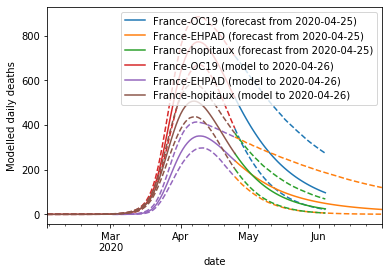

In [17]:

country_list = ["France-OC19", "France-EHPAD", "France-hopitaux"]

ax_forecast = plot_forecast_countries(model.data["forecasting"], country_list=country_list,max_date=None)
ax_forecast = plot_model_countries(model.data["modelling"], country_list=country_list,max_date=None, ax=ax_forecast)


In [30]:
model.data["modelling"].columns

Index(['Unnamed: 0', 'time', 'country', 'region', 'reported_cases',
       'reported_cases_c', 'predicted_cases_c', 'predicted_min_c',
       'predicted_max_c', 'predicted_cases', 'predicted_min', 'predicted_max',
       'predicted_min2', 'predicted_max2', 'deaths', 'deaths_c',
       'estimated_deaths_c', 'death_min_c', 'death_max_c', 'estimated_deaths',
       'death_min', 'death_max', 'death_min2', 'death_max2', 'rt', 'rt_min',
       'rt_max', 'rt_min2', 'rt_max2', 'date'],
      dtype='object')

In [19]:
country_list = ["France-OC19", "France-EHPAD", "France-hopitaux"]
ax_forecast = plot_forecast_countries(forecast_df, country_list,max_date=None)
ax_forecast = plot_forecast_countries(analysis_set_france.loc[17,:]["data"].data["forecasting"], country_list,max_date='2020-05-01', ax=ax_forecast)
ax_forecast.set_ylim(0, 1000)

NameError: name 'forecast_df' is not defined

In [20]:
analysis_set.loc[analysis_set.apply(lambda x: not ("France-OC19" in x["modelling zones"]), axis=1),:]


,folder,version,last available data,number of countries,number of zones,countries,modelling zones,,model
16,./runs/base-fullrun-20200415T200000-1366540,v2,2020-04-13,1,16,{'France': True},"{'Auvergne-Rhône-Alpes': True, 'Bourgogne-Fran...",,<model_analysis.data_load.Model_Folder object ...
17,./runs/base-fullrun-20200416T224705-844325,v2,2020-04-15,14,29,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Auvergne-Rhône-Alpes': True...",,<model_analysis.data_load.Model_Folder object ...
18,./runs/base-fullrun-20200418T003711-932055,v2,2020-04-16,14,14,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Belgium': True, 'Denmark': ...",,<model_analysis.data_load.Model_Folder object ...


In [21]:
analysis_set_france

,folder,version,last available data,number of countries,number of zones,countries,modelling zones,,model
3,./runs/base-fullrun-20200428T002438-3665609,v3,2020-03-24,13,23,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Belgium': True, 'Bretagne':...",,<model_analysis.data_load.Model_Folder object ...
4,./runs/base-fullrun-20200423T193320-3638456,v2,2020-03-24,13,27,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Auvergne-Rhône-Alpes': True...",,<model_analysis.data_load.Model_Folder object ...
7,./runs/base-fullrun-20200428T002453-3665609,v3,2020-04-01,14,26,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Belgium': True, 'Bretagne':...",,<model_analysis.data_load.Model_Folder object ...
8,./runs/base-fullrun-20200423T193324-3638456,v2,2020-04-01,14,30,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Auvergne-Rhône-Alpes': True...",,<model_analysis.data_load.Model_Folder object ...
11,./runs/base-fullrun-20200428T002509-3665609,v3,2020-04-05,14,26,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Belgium': True, 'Bretagne':...",,<model_analysis.data_load.Model_Folder object ...
15,./runs/base-fullrun-20200428T002524-3665609,v3,2020-04-10,14,26,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Belgium': True, 'Bretagne':...",,<model_analysis.data_load.Model_Folder object ...
17,./runs/base-fullrun-20200416T224705-844325,v2,2020-04-15,14,29,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Auvergne-Rhône-Alpes': True...",,<model_analysis.data_load.Model_Folder object ...
18,./runs/base-fullrun-20200418T003711-932055,v2,2020-04-16,14,14,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Belgium': True, 'Denmark': ...",,<model_analysis.data_load.Model_Folder object ...
20,./runs/base-fullrun-20200419T095119-660815,v2,2020-04-18,14,30,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Auvergne-Rhône-Alpes': True...",,<model_analysis.data_load.Model_Folder object ...
24,./runs/base-fullrun-20200428T002513-3665611,v3,2020-04-20,14,26,"{'Austria': True, 'Belgium': True, 'Denmark': ...","{'Austria': True, 'Belgium': True, 'Bretagne':...",,<model_analysis.data_load.Model_Folder object ...
